In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
## read in the iris data
df = pd.read_csv('./iris.txt', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


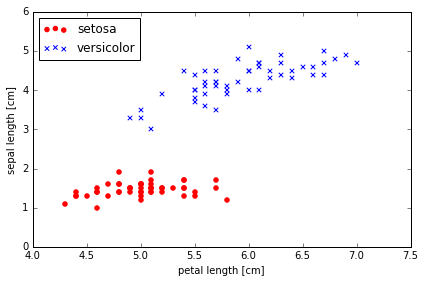

In [3]:
## plot the iris data

# select setosa(-1) and versicolor(1), two labels
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# select only two features for visitualization
X = df.iloc[0:100, [0, 2]].values

# plot the data
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label ='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.legend(loc='upper left')
plt.xlabel('petal length [cm]')
plt.ylabel('sepal length [cm]')

plt.tight_layout()
plt.show()

# 1. Perceptron(PLA)

In [4]:
## implement the perception class

class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        """
        eta : the learning rate
        n_iter : number of iterations
        """
        self.eta = eta
        self.n_iter = n_iter
        
    def net_input(self, X):
        """calculate the inner product between two vectors"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """return the class label"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    
    def fit(self, X, y):
        """
        fit the data
        w_ : weights of the model
        errors_ : errors in each iteration
        return the object
        """
        # X.shape[1] returns number of columns and X.shape[0] return # of rows
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            '''errors: record number of mistakes in every iteration'''
            errors = 0
            for xi,yi in zip(X, y):
                update = self.eta * (yi - self.predict(xi)) #只用那些分错的来做更新
                self.w_[1:] += update*xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self  

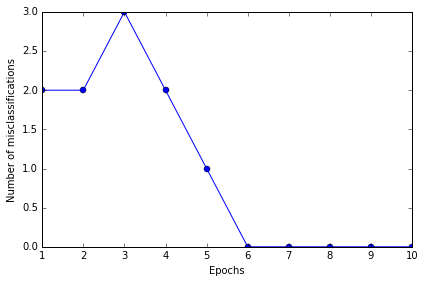

In [5]:
## now, train the perceptron model with the iris dataset

ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')

plt.tight_layout()
plt.show()

In [8]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(X, y, classifier, resolution=0.02):
    # set marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot the samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], 
                   alpha=0.8, c=cmap(idx),
                   marker=markers[idx], label= cl)

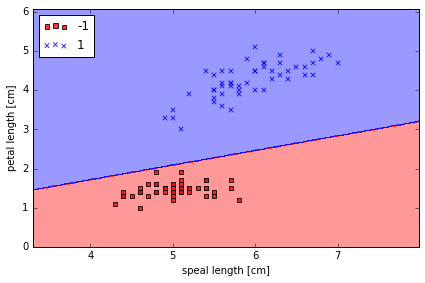

In [9]:
## now plot the decision boundry of perception

plot_decision_boundary(X, y, classifier=ppn)
plt.xlabel('speal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# 2. Adaptive linear neurons and the convergence of learning

In [14]:
## Linear clssifier

class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(X.shape[1] + 1)
        self.cost_ = []
        for _ in range(self.n_iter):
            cost = 0
            # 返回的是向量
            output = self.net_input(X)
            errors = y - output
            self.w_[1:] = self.w_[1:] + self.eta*np.dot(X.T, errors)
            self.w_[0]  = self.w_[0] + self.eta*errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self    
            
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        '''
        compute linear activation
        '''
        return self.net_input(X)
    
    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

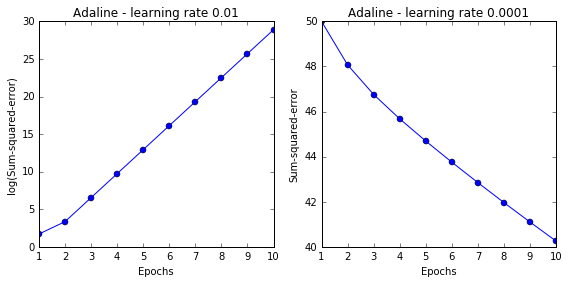

In [21]:
# make the plot of effects of learning rates
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_)+1), np.log10(ada1.cost_), 
          marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_)+1), ada2.cost_, 
          marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - learning rate 0.0001')

plt.tight_layout()
plt.show()

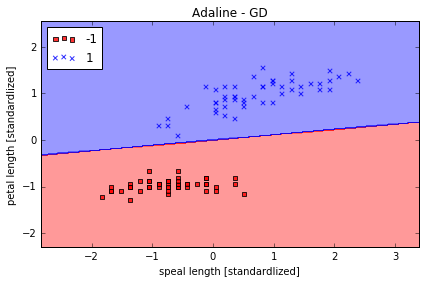

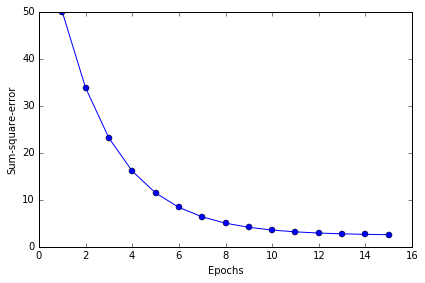

In [22]:
#fit the data and draw the boundary

# normalize the features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_boundary(X_std, y, ada)
plt.title('Adaline - GD')
plt.xlabel('speal length [standardlized]')
plt.ylabel('petal length [standardlized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-square-error')

plt.tight_layout()
plt.show()


# 3. Large scale machine learning -- SGD and OnlineLearning

In [48]:
## adaptive linear neuron classfier with SGD
from numpy.random import seed

class AdalineSGD(object):
    
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        '''
        Attributes
        -----------
        w_ : 1d-array
            Weights after fitting.
        errors_ : list
            Number of misclassifications in every epoch.
        shuffle : bool (default: True)
            Shuffles training data every epoch if True to prevent cycles.
        random_state : int (default: None)
            Set random state for shuffling and initializing the weights.
        '''
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state:
            seed(random_state)
        
    def fit(self, X, y):
        self._initialize_weights(X.shape[1]+1)
        self.cost_ = []
        for _ in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self    
    
    
    def partial_fit(self, X, y):
        '''
        for online learning
        '''
        if not self.w_initialized:
            self.w_ = self._initialize_weights(X.shape[1]+1)
        if y.ravel.shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(xi, target)
        return self        
    
    def _update_weights(self, xi, target):
        output = self.net_input(xi)
        error = target - output
        self.w_[1:] += self.eta * np.dot(xi, error)
        self.w_[0]  += self.eta * error
        cost = error**2 / 2.0
        return cost
        
    def _shuffle(self, X, y):
        ind = np.random.permutation(len(y))
        return X[ind], y[ind]
        
    def _initialize_weights(self, m):
        self.w_ = np.zeros(m)
        self.w_initialized = True
        
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        '''
        compute linear activation
        '''
        return self.net_input(X)
    
    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)


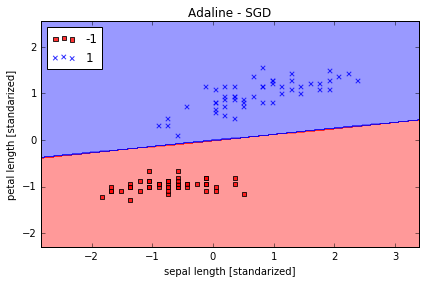

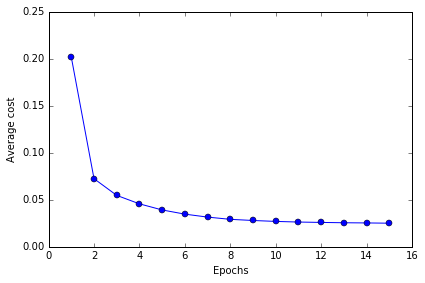

In [50]:
## fit the data with SGD

ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_boundary(X_std, y, ada)
plt.title('Adaline - SGD')
plt.xlabel('sepal length [standarized]')
plt.ylabel('petal length [standarized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average cost')

plt.tight_layout()
plt.show()